<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/o_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network tiny example

Let's create a CNN to recognize X or O shapes in a 9 x 9 pixel image and visualize convolutional filters and filtered images.

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.losses import mean_squared_error
from keras.utils import img_to_array

In [9]:
# building the model
model = Sequential()
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(9, 9, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss=mean_squared_error)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 9, 9, 4)           40        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 4)           0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 4)           0         
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                      

In [13]:
!wget -q -O o_x.png https://github.com/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/data/o_x.png?raw=true

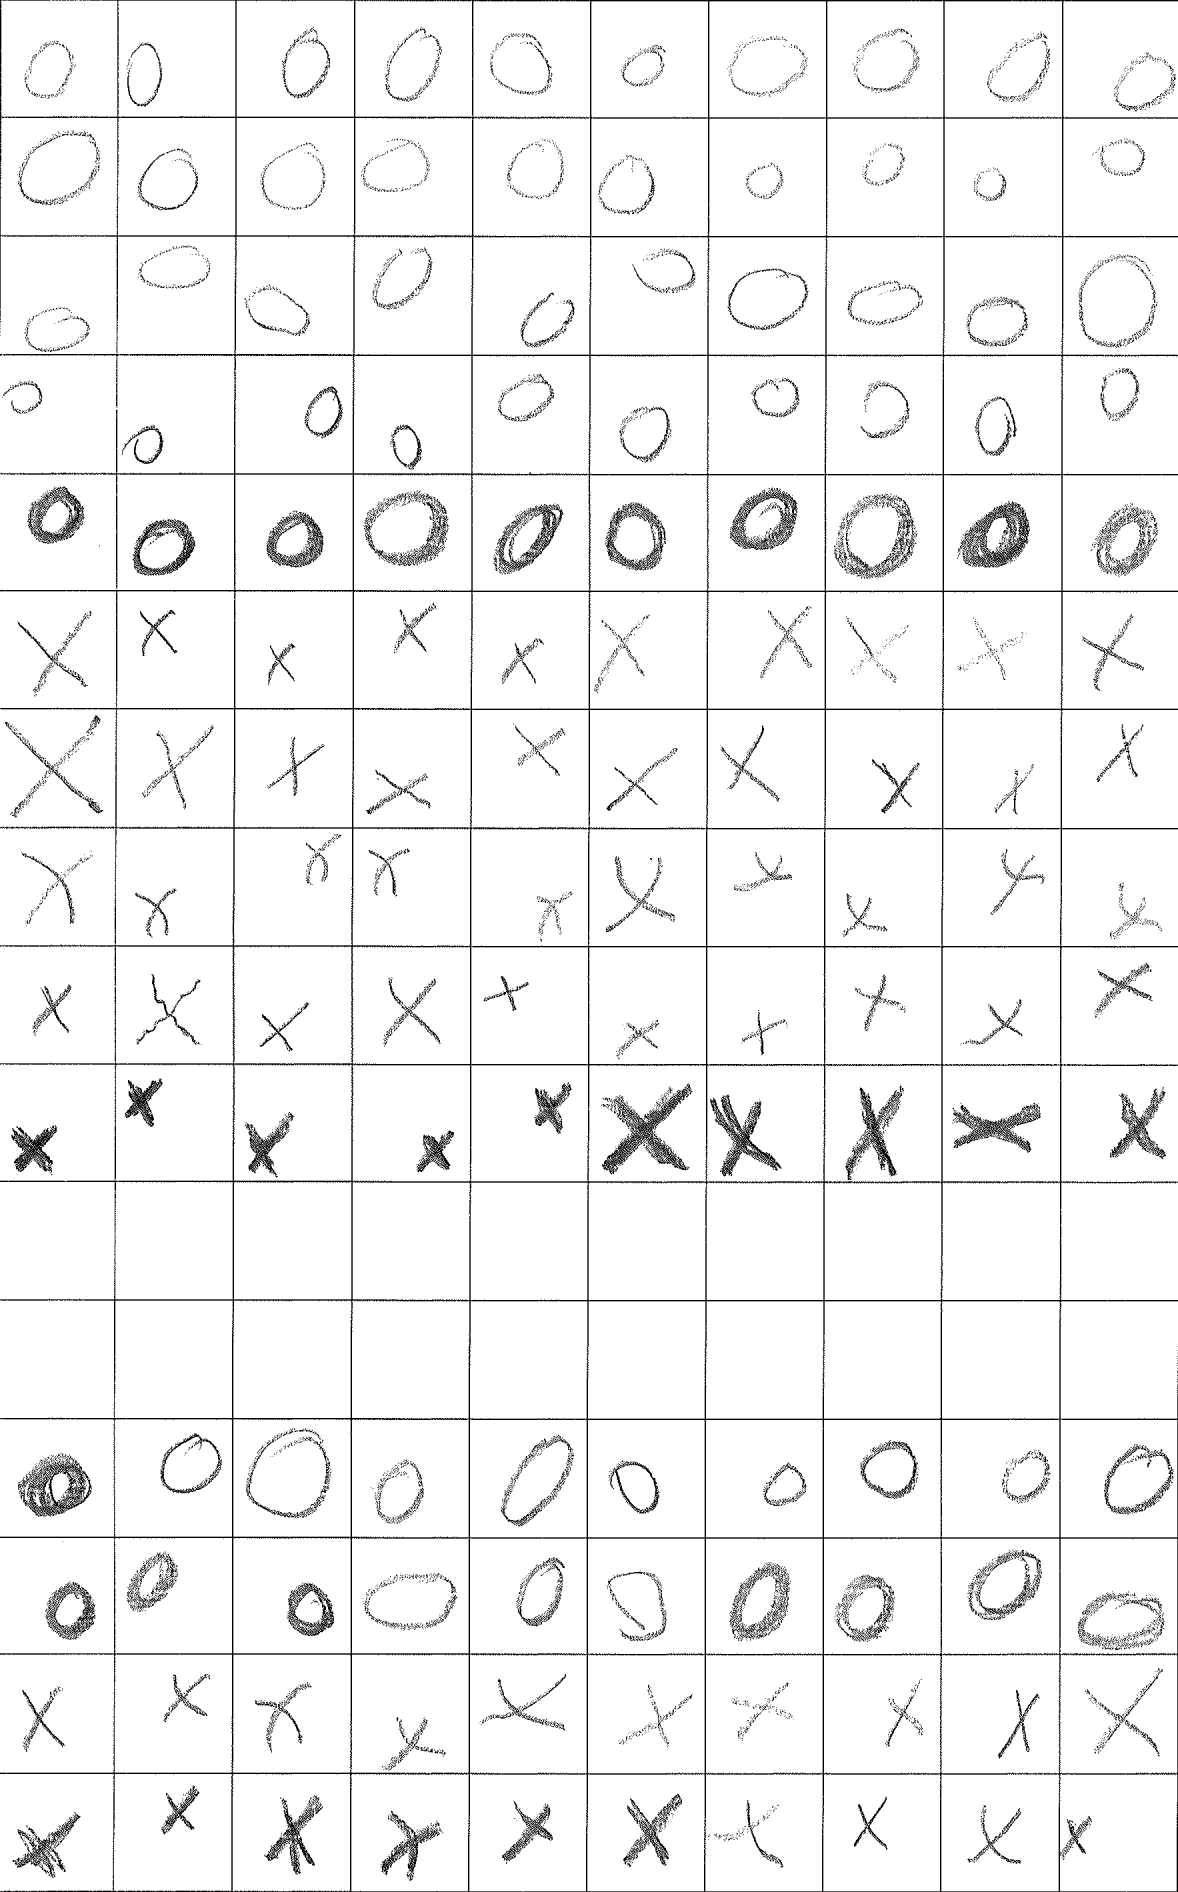

In [54]:
# load all train and test as one image
img = Image.open('o_x.png').convert('L')

In [50]:
# training and test data
labels = ['O', 'X']
X_train = np.zeros((100, 9, 9), dtype='float32')
y_train = np.zeros(100, dtype='float32')
y_train[50:] = 1
X_test = np.zeros((40, 9 ,9), dtype='float32')
y_test = np.zeros(40, dtype='float32')
y_test[20:] = 1

float32


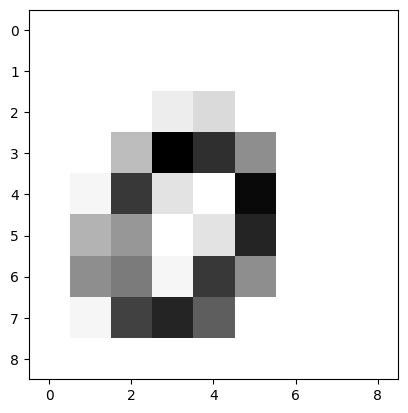

In [68]:
w = img_to_array(img.crop((2, 2, 116, 116)).resize((9,9)))[:,:,0]
#w = w.resize((9,9))
#w = img_to_array(w)[:,:,0]
print(w.dtype)
plt.imshow(w, cmap='gray')

In [73]:
size = 118
border = 4
k = 0
for i in range(10):     # rows
    pixel_top = i * size + border
    pixel_bot = (i + 1) * size - border
    for j in range(10): # columns
        pixel_left = j * size + border
        pixel_righ = (j + 1) * size - border
        box = (pixel_left, pixel_top, pixel_righ, pixel_bot)
        sub_img = img_to_array(img.crop(box).resize((9, 9)))[:,:,0]
        X_train[k] = sub_img
        k += 1

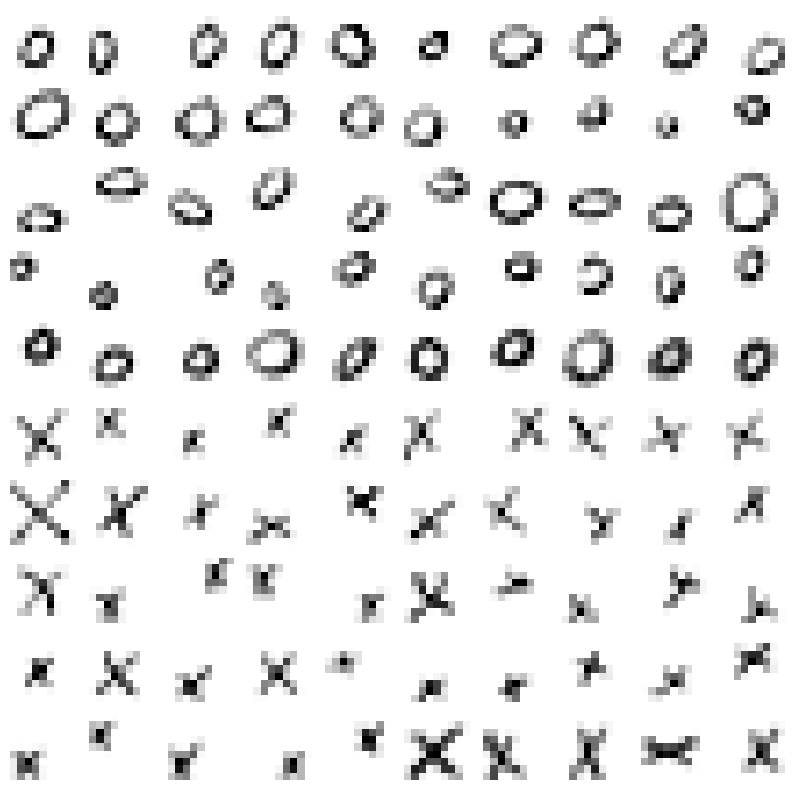

In [74]:
# show images
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
ax = ax.ravel()
for i in range(100):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')